
# YELP 서비스의 리뷰 분석 (NLP)




# PROBLEM STATEMENT

- stars 컬럼은, 유저가 1점부터 5점까지 준 별점이 들어있다.
- text 컬럼은, 별점을 준 유저의 리뷰가 들어있다. 
- cool, useful, funny 컬럼은, 다른사람들이 이 리뷰 글에 투표한 숫자다. 따라서 쿨이 3개이면, 이 리뷰에 대해서 3명이 쿨에 공감했다는 뜻이다.

# STEP #0: LIBRARIES IMPORT


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks/빅데이터 분석/week08')

# STEP #1: IMPORT DATASET

### yelp.csv 파일을 읽어서, yelp_df 변수에 저장하고, 기본적인 통계 분석을 진행한다.

In [ ]:
yelp_df =  pd.read_csv('yelp.csv')

In [ ]:
yelp_df  # Nosql 에 들어았어서 id 값이 문자인거(rdb는 정수값). 리뷰는 nosql에 저장한다.

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [ ]:
yelp_df.loc[yelp_df['user_id']=='rLtl8ZkDX5vH5nAx9C3q5Q',].shape

(15, 10)

# STEP #2: VISUALIZE DATASET

### 리뷰 데이터의 길이를 구하여, 새로운 컬럼 length 컬럼을 만든다.

In [ ]:
yelp_df['length'] = yelp_df['text'].apply(len)

### 리뷰의 length를 히스토그램으로 나타낸다. 

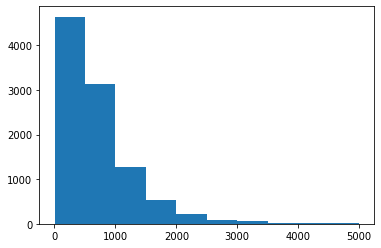

In [ ]:
plt.hist(yelp_df['length'])
plt.show()

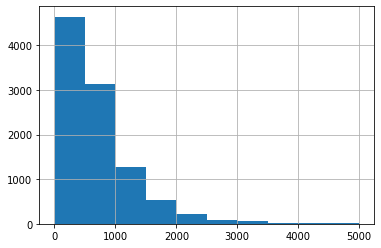

In [ ]:
yelp_df['length'].hist()
plt.show()

In [ ]:
# 리뷰길이와 별점 관계?

In [ ]:
yelp_df[['stars','length']].corr()  # 관련없음

,stars,length
stars,1.000000,-0.114674
length,-0.114674,1.000000


### 리뷰가 가장 긴 글을 찾아서, 리뷰 내용을 확인한다.

In [ ]:
yelp_df.loc[yelp_df['length'] == yelp_df['length'].max() , ]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
55,FCcFT610nQBVcRdY-devQA,2012-01-14,6jRs2P6zTYMn36fVnCu1Zw,4,"In our continuing quest to identify cool, loca...",review,40aklZ2SQPKnlTPZdvAqww,0,1,0,4997


In [ ]:
yelp_df.loc[yelp_df['length'] == yelp_df['length'].max() , 'text'][55]   #pandas series

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

### 리뷰가 가장 짧은 리뷰는 총 몇개이며, 리뷰 내용은?

In [ ]:
yelp_df.describe()

,stars,cool,useful,funny,length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [ ]:
yelp_df.loc[yelp_df['length'] == yelp_df['length'].min() , ]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
6450,tbRu-3NR5za1SEZkszcp5Q,2012-01-03,IVoMGfn9QrZ4dATwc9HBcg,3,X,review,SHcX9hp5RG3-OqsbvissIQ,0,0,0,1


### 별점은 1점부터 5점까지. 각 별점별로 리뷰가 몇개씩 있는지를 시각화 한다.

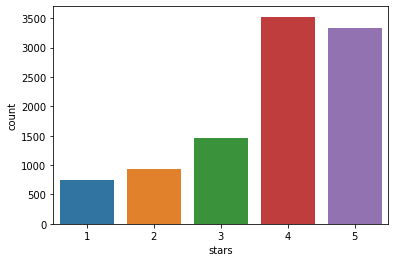

In [ ]:
sns.countplot(data = yelp_df, x = 'stars')
plt.show()

### 별점별로 리뷰가 몇개씩 있는지 시각화 하되, 내림차순으로 정렬하여 시각화 한다.

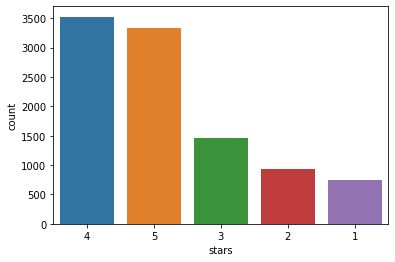

In [ ]:
sns.countplot(data = yelp_df, x = 'stars', order= yelp_df['stars'].value_counts().index)
plt.show()

### 별점이 1점인 리뷰의 데이터프레임과, 별점아 5점인 데이터프레임을 각각 따로 아래의 변수에 저장한다.
### 변수명은 yelp_df_1 , yelp_df_5 로 저장한다.

In [ ]:
yelp_df_1 = yelp_df.loc[ yelp_df['stars']==1, ]

In [ ]:
yelp_df_5 =yelp_df.loc[ yelp_df['stars']==5, ]

### yelp_df_1 , yelp_df_5 두개의 데이터프레임을 하나로 합친다.
### 긍정과 부정의 리뷰 학습을 위해서 하나로 합치는 것.

In [ ]:
yelp_df_1_5 =pd.concat([yelp_df_1, yelp_df_5]) 

In [ ]:
yelp_df_1_5['stars'].unique()

array([1, 5])

### 별점 1과 별점 5의 리뷰는 몇개씩인지, 시각화 한다.

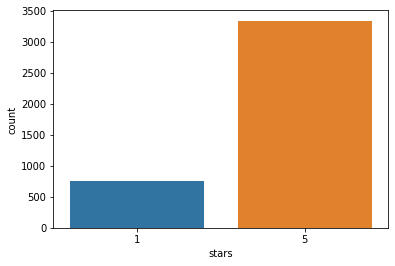

In [ ]:
sns.countplot(data = yelp_df_1_5, x = 'stars')
plt.show()

In [ ]:
# 이런 데이터셋 인발런스 한 데이터셋은 학습이 잘 안댐, 균형적으로 맞춰서 (나노샘플링, 페티크데이터를 만들어서, 업샘플링) 데이터가 많을수록 학습잘됨

### 별점 1점과 별점 5점의 리뷰의 비율이 나오도록, 파이차트로 시각화 한다.

In [ ]:
yelp_df_1_5['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

ValueError: ignored

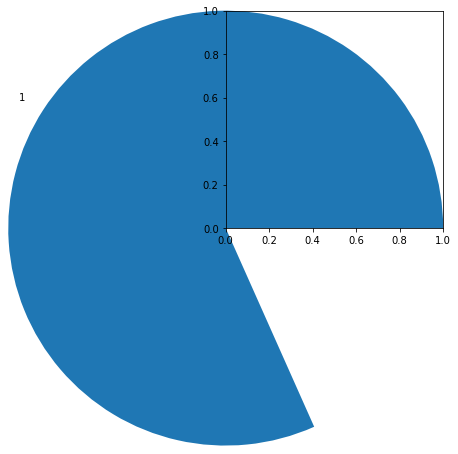

In [ ]:
plt.pie( yelp_df_1_5['stars'].value_counts() , autopct='%.2', labels= [1,5])
plt.show()

In [ ]:
# 테스트용 문장
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

# 정리 : 위의 과정을 하나의 함수로 만든다.

In [ ]:
import string

In [ ]:
import nltk  # natural language tool kit

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
#1. 구두점 제거
#2. 불용어 처리

def message_cleaning (sentense) :
  Test_punc_removed = [ char for char in sentense if char not in string.punctuation ]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean  # 문자열 리스트 리턴

### yelp_df_1_5 데이터프레임의 text 컬럼에, 클리닝 함수를 적용한다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer( analyzer=message_cleaning)

In [ ]:
X = vectorizer.fit_transform(yelp_df_1_5['text'])

In [ ]:
X.shape

(4086, 26435)

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# STEP#4: 학습용과 테스트용으로 데이터프레임을 나눈다. 테스트용은 20%로 설정한다. 그리고 나이브베이즈 모델링 한다.

In [ ]:
X

<4086x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 222391 stored elements in Compressed Sparse Row format>

In [ ]:
y = yelp_df_1_5['stars']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 34) # train 80% 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier = MultinomialNB()  # 알고리즘 적용한 모델 생성

In [ ]:
classifier.fit(X_train, y_train)  # 학습시킴

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# STEP#5: 테스트셋으로 모델 평가. 컨퓨전 매트릭스 사용한다.

In [ ]:
from sklearn.metrics import confusion_matrix  # 분류문제만 metrics 쓰는거임

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_test.values

array([5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5,
       5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 1, 5, 1,
       5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5,
       5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5,
       1, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5,
       1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1,
       5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 1, 5, 5, 5, 5,

In [ ]:
# 정답과 예측 비교

In [ ]:
#       1   , 5

confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# 실제로는 1인데 5라고 한거 36

In [ ]:
(114+648) / cm.sum()

0.9315403422982885

In [ ]:
yelp_df_clean = 

SyntaxError: ignored

# STEP#6 다음 문장이 긍정인지 부정인지 예측한다.


### 1. 'amazing food! highly recommmended'
### 2. 'shit food, made me sick'

In [ ]:
sample = ['amazing food! highly recommmended', 'shit food, made me sick']

In [ ]:
sample_X = vectorizer.transform(sample)  # transform, 이미 만들어놨으니까 변형만 시키면 댐

In [ ]:
classifier.predict(sample_X) # 예측해라

array([5, 1])

- 이제 이걸 서비스 배포하면 댐. 앱이나 웹으로

# WordCloud Visualizing

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
yelp_df_5  # 별점 5점인 긍정 데이터

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [ ]:
words = yelp_df_5['text'].tolist()

In [ ]:
words_as_one_string = ''.join(words)

In [ ]:
wc = WordCloud(background_color= 'white')

In [ ]:
wc.generate(words_as_one_string)

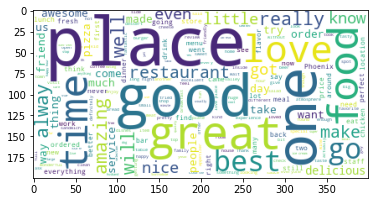

In [ ]:
plt.imshow(wc)
plt.show()

- ####### 불용어 사용  #########

In [ ]:
stopwords = STOPWORDS

In [ ]:
type(stopwords)

set

In [ ]:
# 워드 클라우드에서 food 지우고 싶음

In [ ]:
stopwords.add('food')  # set에 food 단어 추가

In [ ]:
wc = WordCloud(background_color='white', stopwords=stopwords)

In [ ]:
wc.generate(words_as_one_string)

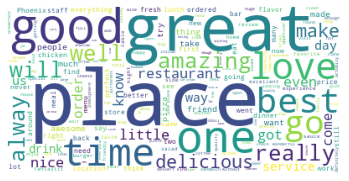

In [124]:
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
###### 별점 1점 짜리 ########

In [125]:
bad_words = yelp_df_1['text'].tolist()

In [126]:
bad_words_as_one_string = ''.join(bad_words)

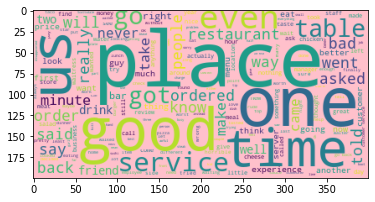

In [127]:
wc2 = WordCloud(background_color='pink', stopwords=stopwords)
wc2.generate(bad_words_as_one_string)

plt.imshow(wc2)
plt.show()